# EDA of logd74.tsv

## Summary
1. There are 4200 experimental records
2. All the SMILES are unique.
3. All the experiments were held at pH=7.4
4. Temperature is not mentioned

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

import sys

DATA_PATH = "../data/raw/logd/"

In [24]:
logd_data = pd.read_csv(DATA_PATH + "logd74.tsv", delimiter="\t", low_memory=False)
logd_data.head()

,ID,SMILES,logD7.4
0,A-logD7.4-100,Fc1cc2c(N(C=C(C(O)=O)C2=O)C2CC2)cc1N1CCNCC1,-0.96
1,A-logD7.4-101,S1(=O)(=O)N(CCN1C)c1cc2c([nH]cc2CCN(C)C)cc1,-0.92
2,A-logD7.4-104,OC=1C(=O)C=CN(CCCO)C=1C,-0.90
3,A-logD7.4-105,Fc1cc2c(N(C=C(C(O)=O)C2=O)c2ccccc2C)cc1N1CCNCC1,-0.83
4,A-logD7.4-106,OC=1C(=O)C=CN(CCC(=O)NCC)C=1C,-0.82


In [25]:
logd_data = logd_data.drop(columns=["ID"])
logd_data = logd_data.rename(columns={"logD7.4": "logD", "SMILES": "smiles"})

In [26]:
logd_data.head()

,smiles,logD
0,Fc1cc2c(N(C=C(C(O)=O)C2=O)C2CC2)cc1N1CCNCC1,-0.96
1,S1(=O)(=O)N(CCN1C)c1cc2c([nH]cc2CCN(C)C)cc1,-0.92
2,OC=1C(=O)C=CN(CCCO)C=1C,-0.90
3,Fc1cc2c(N(C=C(C(O)=O)C2=O)c2ccccc2C)cc1N1CCNCC1,-0.83
4,OC=1C(=O)C=CN(CCC(=O)NCC)C=1C,-0.82


In [27]:
logd_data.shape

(1130, 2)

In [28]:
logd_data.logD.isna().sum()

0

In [29]:
logd_data.smiles.unique().shape

(1112,)

In [30]:
logd_data = logd_data.drop_duplicates()
logd_data.shape

(1127, 2)

In [40]:
grouped_data = logd_data.groupby(['smiles']).agg(count_of_records=('logD', 'count'), 
                                       var=('logD', 'var')).sort_values(by=['count_of_records'], ascending=False)
grouped_data.head(20)

,count_of_records,var
smiles,,
O=C1CC[C@@]2([C@@H]3[C@H]([C@@H]4CC[C@H](O)[C@]4(CC3)C)CCC2=C1)C,2,0.000200
Clc1cc(N2CCN(CC2)CCCN2N=C3N(C=CC=C3)C2=O)ccc1,2,0.092450
Clc1cc(O)ccc1,2,0.001800
OC(=O)C(C)c1cc(ccc1)C(=O)c1ccccc1,2,0.004232
Clc1ccc(cc1)C(=O)n1c2c(cc(OC)cc2)c(CC(O)=O)c1C,2,0.432450
S1(=O)(=O)N(C)C(C(=O)Nc2ncccc2)=C(O)c2c1cccc2,2,0.057800
Clc1ccc(cc1S(=O)(=O)N)C1(O)NC(=O)c2c1cccc2,2,0.054450
N(CCCN1c2c(CCc3c1cccc3)cccc2)(C)C,2,0.000450
F[C@@]12[C@H]([C@@H]3C[C@@H](C)[C@](O)(C(=O)CO)[C@]3(C[C@@H]1O)C)CCC1=CC(=O)C=C[C@@]12C,2,0.004050


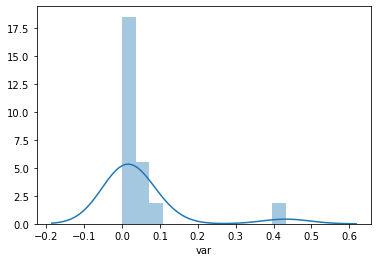

In [41]:
sns.distplot(grouped_data['var'])

In [43]:
logd_data = logd_data.groupby(['smiles']).mean().reset_index()
logd_data.head()

,smiles,logD
0,Brc1[nH]c2c3c1C[C@@H]1N(C[C@@H](C=C1c3ccc2)C(=...,4.20
1,Brc1c2nccnc2ccc1NC=1NCCN=1,0.31
2,Brc1cc(Br)cc(Br)c1NC=1NCCN=1,2.51
3,Brc1cc(Br)cc(C(F)(F)F)c1NC=1NCCN=1,2.80
4,Brc1cc(Cl)c(NC=2NCCN=2)c(Cl)c1,2.31


In [44]:
logd_data.shape

(1112, 2)

In [45]:
logd_data.smiles.nunique()

1112

In [46]:
# all the experiments were held with pH=7.4
logd_data['pH'] = pd.Series([7.4 for i in range(1112)])

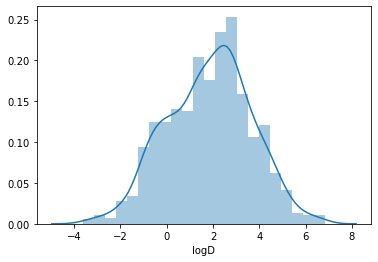

In [47]:
sns.distplot(logd_data.logD)

In [48]:
logd_data.to_csv("../data/1_filtering/logd/logd_logd74_dataset.csv")